Reference code - https://github.com/pdichone/advanced-rag-techniques

Udemy Certification is included in the repo

In [1]:
from helper_utils import project_embeddings, word_wrap
from pypdf import PdfReader
import os
from openai import OpenAI
from dotenv import load_dotenv

from pypdf import PdfReader
# import umap
import umap.umap_ as umap
import pandas as pd
import numpy as np

/Users/aditiganeshjoshi/advanced-rag-techniques-main/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load environment variables from .env file
load_dotenv()

openai_key = os.getenv("OPENAI_API_KEY")
client = OpenAI(api_key=openai_key)


In [4]:
reader = PdfReader("data/sapphire.pdf")
pdf_texts = [p.extract_text().strip() for p in reader.pages]
# print(pdf_texts[:5])

# Filter the empty strings
pdf_texts = [text for text in pdf_texts if text]

In [6]:
from langchain.text_splitter import (
    RecursiveCharacterTextSplitter,
    SentenceTransformersTokenTextSplitter,
)

character_splitter = RecursiveCharacterTextSplitter(
    separators=["\n\n", "\n", ". ", " ", ""], chunk_size=1000, chunk_overlap=0
)
character_split_texts = character_splitter.split_text("\n\n".join(pdf_texts))

print(word_wrap(character_split_texts[10]))
print(f"\nTotal chunks: {len(character_split_texts)}")

• Any other documentation required by the Benefit Administrator  
to substantiate the c
laim
*Not applicable to residents in certain states
All documents must be postmarked wi
thin three hundred sixty-five (365) days of the theft or damage date, or Your claim may
 be denied.
Filing online is faster: visit www.eclaimsline.com
Transference of Claims
A
fter Your claim is paid, Your rights and remedies against any party in regard to the th
eft or damage is transferred to the Benefit Administrator, to the extent of the cost of
 payment made to You. You must give the Benefit Administrator all assistance reasonably
 required to secure all rights and remedies.
Definitions
Account  – Your credit card Ac
count issued by 
JPMorgan Chase Bank, N.A. and/or its affiliatesActual Cash Value  – th
e amount a Rental Vehicle is determined to be 
worth based on its market value, age and
 condition at the time of loss

Total chunks: 153


In [7]:
token_splitter = SentenceTransformersTokenTextSplitter(
    chunk_overlap=0, tokens_per_chunk=256
)
token_split_texts = []
for text in character_split_texts:
    token_split_texts += token_splitter.split_text(text)

print(word_wrap(token_split_texts[10]))
print(f"\nTotal chunks: {len(token_split_texts)}")

/Users/aditiganeshjoshi/advanced-rag-techniques-main/venv/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


• any other documentation required by the benefit administrator to substantiate the cla
im * not applicable to residents in certain states all documents must be postmarked wit
hin three hundred sixty - five ( 365 ) days of the theft or damage date, or your claim 
may be denied. filing online is faster : visit www. eclaimsline. com transference of cl
aims after your claim is paid, your rights and remedies against any party in regard to 
the theft or damage is transferred to the benefit administrator, to the extent of the c
ost of payment made to you. you must give the benefit administrator all assistance reas
onably required to secure all rights and remedies. definitions account – your credit ca
rd account issued by jpmorgan chase bank, n. a. and / or its affiliatesactual cash valu
e – the amount a rental vehicle is determined to be worth based on its market value, ag
e and condition at the time of loss

Total chunks: 153


In [8]:
import chromadb
from chromadb.utils.embedding_functions import SentenceTransformerEmbeddingFunction

embedding_function = SentenceTransformerEmbeddingFunction()
print(embedding_function([token_split_texts[10]]))

[[-0.01010268833488226, 0.08116095513105392, -0.018261486664414406, 0.017284918576478958, 0.05569984018802643, 0.03607139363884926, 0.03862407058477402, 0.08367703855037689, 0.0008984110318124294, -0.10635174065828323, 0.07421156764030457, -0.02269708178937435, 0.07979875057935715, -0.023488590493798256, 0.03787567466497421, -0.018554165959358215, 0.033249907195568085, 0.05702948570251465, 0.008307312615215778, 0.009359143674373627, -0.018351813778281212, -0.09369456768035889, -0.019834112375974655, 0.047300368547439575, 0.009967771358788013, 0.007227182388305664, -0.011849419213831425, 0.06760971248149872, 0.0073988717049360275, -0.03212699666619301, 0.05732448771595955, -0.020758016034960747, 0.12930724024772644, -0.04388413205742836, 0.08983231335878372, -0.005969107151031494, 0.0012733169132843614, 0.047445304691791534, 0.03412799537181854, -0.10219135135412216, -0.0329304113984108, -0.03368524834513664, 0.016744637861847878, -0.0911349356174469, 0.006894331891089678, -0.0039745108

In [9]:
chroma_client = chromadb.Client()
chroma_collection = chroma_client.create_collection(
    "qa-collection", embedding_function=embedding_function
)

# extract the embeddings of the token_split_texts
ids = [str(i) for i in range(len(token_split_texts))]
chroma_collection.add(ids=ids, documents=token_split_texts)
count = chroma_collection.count()
print(count)

153


In [151]:
query = "Until how many days does the card cover for vehicle damage? "
results = chroma_collection.query(query_texts=[query], n_results=5)
retrieved_documents = results["documents"][0]

for document in retrieved_documents:
    print(word_wrap(document))
    print("\n")

3 auto rental collision damage waiver the auto rental collision damage waiver benefit p
rovides reimbursement for damages caused by theft or collision up to the actual cash va
lue of most rented cars. the auto rental collision damage waiver acts as primary covera
ge and covers theft, damage, valid loss - of - use charges imposed and substantiated by
 the auto rental company, administrative fees, and reasonable and customary towing char
ges ( due to a covered theft or damage ) to the nearest qualified repair facility. the 
auto rental collision damage waiver covers no other type of loss. for example, in the e
vent of a collision involving your rental vehicle, damage to any other driver ’ s car, 
the injury of anyone, or damage to anything is not covered. rental periods up to thirty
 - one ( 31 ) consecutive days are covered. you are covered when your name is embossed 
on an eligible card issued in the united states, and you use your credit card account


leaving the car running and unat

In [152]:
# Generate the final answer using the OpenAI model
def generate_answer(query, context, model="gpt-3.5-turbo"):

    prompt = f"""
    You are a knowledgeable customer service agent. 
    Your users are inquiring about credit card policy details. 
    """

    messages = [
        {
            "role": "system",
            "content": prompt,
        },
        {
            "role": "user",
            "content": f"based on the following context:\n\n{context}\n\nAnswer the query: '{query}'",
        },
    ]

    response = client.chat.completions.create(
        model=model,
        messages=messages,
    )
    content = response.choices[0].message.content
    content = content.split("\n")
    return content




In [153]:
df_result = pd.DataFrame()

In [154]:
# from original query
res_orig = generate_answer(query=query, context='')
print("Final Answer:")
print(res_orig)
res = pd.DataFrame({"Type": 'Original Query',"Query": query, "Context" : '', "Answer":res_orig})
df_result = pd.concat([df_result,res])


Final Answer:
["The credit card's coverage for vehicle damage typically varies depending on the card issuer and the specific terms and conditions of the card. In general, credit cards may provide coverage for vehicle damage resulting from collisions or theft for a period of up to 15-31 days, but this can vary. It's important to review your specific credit card's benefits guide or contact your card issuer directly to confirm the exact coverage period for vehicle damage."]


In [155]:
df_result = df_result.reset_index(drop=True)

In [156]:
df_result

,Type,Query,Context,Answer
0,Original Query,Until how many days does the card cover for ve...,,The credit card's coverage for vehicle damage ...


In [157]:
# basic RAG
context = "\n\n".join(retrieved_documents)
res_rag = generate_answer(query=query, context=context)
print("Final Answer:")
print(res_rag)
res = pd.DataFrame({"Type":'Basic RAG',"Query": query, "Context" : context, "Answer":res_rag})
df_result = pd.concat([df_result,res])

Final Answer:
['The card covers for vehicle damage reported within one hundred (100) days from the date of the incident.']


In [158]:
df_result = df_result.reset_index(drop=True)


In [159]:
df_result

,Type,Query,Context,Answer
0,Original Query,Until how many days does the card cover for ve...,,The credit card's coverage for vehicle damage ...
1,Basic RAG,Until how many days does the card cover for ve...,3 auto rental collision damage waiver the auto...,The card covers for vehicle damage reported wi...


### Query Expansion - Answer

In [186]:
def augment_query_generated(query, model="gpt-3.5-turbo"):
    prompt = """You are a helpful expert customer support agent. 
   Provide an example answer to the given question, that might be found in a credit card policy documentation."""
    messages = [
        {
            "role": "system",
            "content": prompt,
        },
        {"role": "user", "content": query},
    ]

    response = client.chat.completions.create(
        model=model,
        messages=messages,
    )
    content = response.choices[0].message.content
    return content


original_query = "Until how many days does the card cover for vehicle damage?"
hypothetical_answer = augment_query_generated(original_query)

joint_query = f"{original_query} {hypothetical_answer}"
print(word_wrap(joint_query))


Until how many days does the card cover for vehicle damage? The credit card provides co
verage for vehicle damage for up to 31 consecutive days when the rental vehicle is paid
 for in full using the card. Please refer to the credit card's benefits guide for speci
fic details and limitations related to this coverage.


In [187]:
results = chroma_collection.query(
    query_texts=joint_query, n_results=5, include=["documents", "embeddings"]
)
retrieved_documents = results["documents"][0]


for doc in retrieved_documents:
    print(word_wrap(doc))
    print("")

3 auto rental collision damage waiver the auto rental collision damage waiver benefit p
rovides reimbursement for damages caused by theft or collision up to the actual cash va
lue of most rented cars. the auto rental collision damage waiver acts as primary covera
ge and covers theft, damage, valid loss - of - use charges imposed and substantiated by
 the auto rental company, administrative fees, and reasonable and customary towing char
ges ( due to a covered theft or damage ) to the nearest qualified repair facility. the 
auto rental collision damage waiver covers no other type of loss. for example, in the e
vent of a collision involving your rental vehicle, damage to any other driver ’ s car, 
the injury of anyone, or damage to anything is not covered. rental periods up to thirty
 - one ( 31 ) consecutive days are covered. you are covered when your name is embossed 
on an eligible card issued in the united states, and you use your credit card account

regardless of who is at fault and

/Users/aditiganeshjoshi/advanced-rag-techniques-main/venv/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


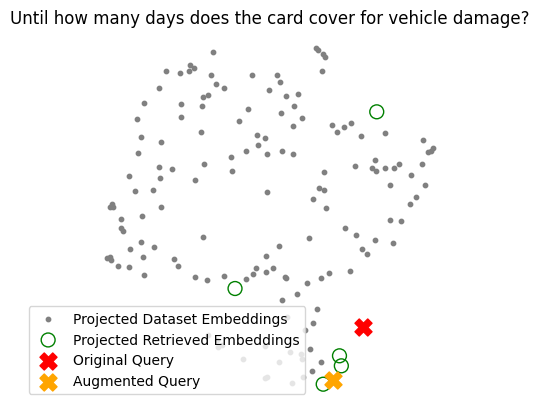

<Figure size 640x480 with 0 Axes>

In [46]:
embeddings = chroma_collection.get(include=["embeddings"])["embeddings"]
umap_transform = umap.UMAP(random_state=0, transform_seed=0).fit(embeddings)
projected_dataset_embeddings = project_embeddings(embeddings, umap_transform)


retrieved_embeddings = results["embeddings"][0]
original_query_embedding = embedding_function([original_query])
augmented_query_embedding = embedding_function([joint_query])

projected_original_query_embedding = project_embeddings(
    original_query_embedding, umap_transform
)
projected_augmented_query_embedding = project_embeddings(
    augmented_query_embedding, umap_transform
)
projected_retrieved_embeddings = project_embeddings(
    retrieved_embeddings, umap_transform
)

import matplotlib.pyplot as plt

# Plot the projected query and retrieved documents in the embedding space
plt.figure()

plt.scatter(
    projected_dataset_embeddings[:, 0],
    projected_dataset_embeddings[:, 1],
    s=10,
    color="gray",
    label="Projected Dataset Embeddings"
)
plt.scatter(
    projected_retrieved_embeddings[:, 0],
    projected_retrieved_embeddings[:, 1],
    s=100,
    facecolors="none",
    edgecolors="g",
    label="Projected Retrieved Embeddings"
)
plt.scatter(
    projected_original_query_embedding[:, 0],
    projected_original_query_embedding[:, 1],
    s=150,
    marker="X",
    color="r",
    label="Original Query"
)
plt.scatter(
    projected_augmented_query_embedding[:, 0],
    projected_augmented_query_embedding[:, 1],
    s=150,
    marker="X",
    color="orange",
    label="Augmented Query"
)

plt.gca().set_aspect("equal", "datalim")
plt.title(f"{original_query}")
plt.axis("off")
plt.legend()
plt.show()  # display the plot
plt.savefig('embeddings_and_retrieved_documents.png')

In [162]:
joint_query

'Until how many days does the card cover for vehicle damage? "The credit card provides coverage for vehicle damage up to 31 consecutive days when the cardholder uses the card to pay for the rental car in full and declines the rental company\'s collision damage waiver (CDW) or similar provision."'

In [188]:
# query expansion with sample answer
context = "\n\n".join(retrieved_documents)
res_rag_qea = generate_answer(query=joint_query, context=context)
print("Final Answer:")
print(res_rag_qea)
res = pd.DataFrame({"Type":'Query Expansion with Sample Answer', "Query": joint_query, "Context" : context, "Answer":res_rag_qea})
df_result = pd.concat([df_result,res])

Final Answer:
["The credit card provides coverage for vehicle damage for up to 31 consecutive days when the rental vehicle is paid for in full using the card. Please refer to the credit card's benefits guide for specific details and limitations related to this coverage."]


In [189]:
df_result = df_result.reset_index(drop=True)

In [190]:
df_result

,Type,Query,Answer,Context
0,Original Query,Until how many days does the card cover for ve...,The credit card's coverage for vehicle damage ...,
1,Basic RAG,Until how many days does the card cover for ve...,The card covers for vehicle damage reported wi...,3 auto rental collision damage waiver the auto...
2,Query Expansion with Sample Answer,Until how many days does the card cover for ve...,The credit card provides coverage for vehicle ...,3 auto rental collision damage waiver the auto...


### Query Expansion - Generate Multiple Subqueries

In [191]:
def generate_multi_query(query, model="gpt-3.5-turbo"):

    prompt = """
    You are a knowledgeable customer service agent. 
    Your users are inquiring about credit card policy details. 
    For the given question, propose up to five related questions to assist them in finding the information they need. 
    Provide concise, single-topic questions (withouth compounding sentences) that cover various aspects of the topic. 
    Ensure each question is complete and directly related to the original inquiry. 
    List each question on a separate line without numbering.
                """

    messages = [
        {
            "role": "system",
            "content": prompt,
        },
        {"role": "user", "content": query},
    ]

    response = client.chat.completions.create(
        model=model,
        messages=messages,
    )
    content = response.choices[0].message.content
    content = content.split("\n")
    return content


original_query = (
    "Until how many days does the card cover for vehicle damage?"
)
aug_queries = generate_multi_query(original_query)

# 1. First step show the augmented queries
for query in aug_queries:
    print("\n", query)


 - Does the credit card provide any insurance coverage for vehicle damage?

 - What is the maximum coverage offered by the credit card for vehicle damage?

 - Are there any specific requirements or conditions to be eligible for vehicle damage coverage?

 - Does the coverage for vehicle damage apply to all types of vehicles?

 - Is there a claims process that needs to be followed for vehicle damage coverage?


In [192]:
joint_query = [
    original_query
] + aug_queries  # original query is in a list because chroma can actually handle multiple queries, so we add it in a list

# print("======> \n\n", joint_query)

results = chroma_collection.query(
    query_texts=joint_query, n_results=5, include=["documents", "embeddings"]
)
retrieved_documents = results["documents"]

# Deduplicate the retrieved documents
unique_documents = set()
for documents in retrieved_documents:
    for document in documents:
        unique_documents.add(document)

for i, documents in enumerate(retrieved_documents):
    print(f"Query: {joint_query[i]}")
    print("")
    print("Results:")
    for doc in documents:
        print(word_wrap(doc))
        print("")
    print("-" * 100)

Query: Until how many days does the card cover for vehicle damage?

Results:
3 auto rental collision damage waiver the auto rental collision damage waiver benefit p
rovides reimbursement for damages caused by theft or collision up to the actual cash va
lue of most rented cars. the auto rental collision damage waiver acts as primary covera
ge and covers theft, damage, valid loss - of - use charges imposed and substantiated by
 the auto rental company, administrative fees, and reasonable and customary towing char
ges ( due to a covered theft or damage ) to the nearest qualified repair facility. the 
auto rental collision damage waiver covers no other type of loss. for example, in the e
vent of a collision involving your rental vehicle, damage to any other driver ’ s car, 
the injury of anyone, or damage to anything is not covered. rental periods up to thirty
 - one ( 31 ) consecutive days are covered. you are covered when your name is embossed 
on an eligible card issued in the united st

/Users/aditiganeshjoshi/advanced-rag-techniques-main/venv/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


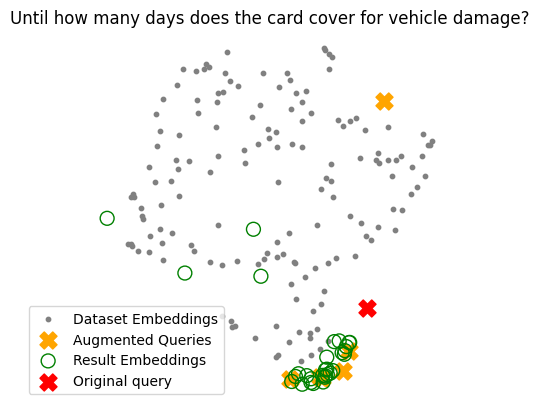

In [55]:
embeddings = chroma_collection.get(include=["embeddings"])["embeddings"]
umap_transform = umap.UMAP(random_state=0, transform_seed=0).fit(embeddings)
projected_dataset_embeddings = project_embeddings(embeddings, umap_transform)

# 4. We can also visualize the results in the embedding space
original_query_embedding = embedding_function([original_query])
augmented_query_embeddings = embedding_function(joint_query)


project_original_query = project_embeddings(original_query_embedding, umap_transform)
project_augmented_queries = project_embeddings(
    augmented_query_embeddings, umap_transform
)

retrieved_embeddings = results["embeddings"]
result_embeddings = [item for sublist in retrieved_embeddings for item in sublist]

projected_result_embeddings = project_embeddings(result_embeddings, umap_transform)

import matplotlib.pyplot as plt


# Plot the projected query and retrieved documents in the embedding space
plt.figure()
plt.scatter(
    projected_dataset_embeddings[:, 0],
    projected_dataset_embeddings[:, 1],
    s=10,
    color="gray",
    label='Dataset Embeddings'
)
plt.scatter(
    project_augmented_queries[:, 0],
    project_augmented_queries[:, 1],
    s=150,
    marker="X",
    color="orange",
    label='Augmented Queries'
)
plt.scatter(
    projected_result_embeddings[:, 0],
    projected_result_embeddings[:, 1],
    s=100,
    facecolors="none",
    edgecolors="g",
    label='Result Embeddings'
)
plt.scatter(
    project_original_query[:, 0],
    project_original_query[:, 1],
    s=150,
    marker="X",
    color="r",
    label='Original query'
)

plt.gca().set_aspect("equal", "datalim")
plt.title(f"{original_query}")
plt.axis("off")
plt.legend()
plt.show()  # display the plot


In [182]:
joint_query

['Until how many days does the card cover for vehicle damage?',
 '1. What specific type of vehicle damage does the credit card cover?',
 '2. Is there a deductible for vehicle damage coverage on the credit card?',
 '3. Are there any restrictions on the age or type of vehicle that is covered for damage?',
 '4. Does the credit card require any additional documentation to process a vehicle damage claim?',
 '5. Are there specific steps that need to be followed to initiate a vehicle damage claim with the credit card company?']

In [193]:
context = "\n\n".join(unique_documents)
res_qem = generate_answer(query=joint_query, context=context)
print("Final Answer:")
print(res_qem)

Final Answer:
['The card covers vehicle damage for up to thirty-one (31) consecutive days. The credit card provides auto rental collision damage waiver coverage for damages caused by theft or collision up to the actual cash value of most rented cars. The maximum coverage offered is for the actual cash value of the rented vehicle.', '', 'To be eligible for vehicle damage coverage, your name must be embossed on an eligible card issued in the United States, and you must use your credit card account rewards programs associated with your account to initiate and complete the car rental transaction.', '', "Certain vehicles are not covered by this benefit, including high-value motor vehicles, exotic and antique cars, cargo vans, trucks with open cargo beds, motorcycles, and more. It's best to contact the benefit administrator if you have any doubts about coverage for a specific type of vehicle.", '', 'There is a claims process that needs to be followed for vehicle damage coverage. In case of t

In [194]:
print(res_qem)

['The card covers vehicle damage for up to thirty-one (31) consecutive days. The credit card provides auto rental collision damage waiver coverage for damages caused by theft or collision up to the actual cash value of most rented cars. The maximum coverage offered is for the actual cash value of the rented vehicle.', '', 'To be eligible for vehicle damage coverage, your name must be embossed on an eligible card issued in the United States, and you must use your credit card account rewards programs associated with your account to initiate and complete the car rental transaction.', '', "Certain vehicles are not covered by this benefit, including high-value motor vehicles, exotic and antique cars, cargo vans, trucks with open cargo beds, motorcycles, and more. It's best to contact the benefit administrator if you have any doubts about coverage for a specific type of vehicle.", '', 'There is a claims process that needs to be followed for vehicle damage coverage. In case of theft or damage

In [195]:
len(res_qem)

7

In [196]:
res = pd.DataFrame({"Type": 'Query Expansion with multiple subqueries',"Query": " ".join(joint_query), "Context" : context, "Answer":[" ".join(res_qem)]})
df_result = pd.concat([df_result,res])

In [197]:
df_result = df_result.reset_index(drop=True)
df_result

,Type,Query,Answer,Context
0,Original Query,Until how many days does the card cover for ve...,The credit card's coverage for vehicle damage ...,
1,Basic RAG,Until how many days does the card cover for ve...,The card covers for vehicle damage reported wi...,3 auto rental collision damage waiver the auto...
2,Query Expansion with Sample Answer,Until how many days does the card cover for ve...,The credit card provides coverage for vehicle ...,3 auto rental collision damage waiver the auto...
3,Query Expansion with multiple subqueries,Until how many days does the card cover for ve...,The card covers vehicle damage for up to thirt...,• any portion of the cost has been paid for wi...


In [198]:
df_result.to_csv('results.csv')

In [199]:
df_result= df_result[['Type','Query','Answer','Context']]
df_result

,Type,Query,Answer,Context
0,Original Query,Until how many days does the card cover for ve...,The credit card's coverage for vehicle damage ...,
1,Basic RAG,Until how many days does the card cover for ve...,The card covers for vehicle damage reported wi...,3 auto rental collision damage waiver the auto...
2,Query Expansion with Sample Answer,Until how many days does the card cover for ve...,The credit card provides coverage for vehicle ...,3 auto rental collision damage waiver the auto...
3,Query Expansion with multiple subqueries,Until how many days does the card cover for ve...,The card covers vehicle damage for up to thirt...,• any portion of the cost has been paid for wi...


In [200]:
df_result.to_csv('results.csv')
